# Jupyter notebook to treat the dataset usage

In this notebook we will try to compute multiples values about the dataset usage in PPG-Biometric recognition problem.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import random
import math
from matplotlib.pyplot import cm
import squarify

sns.set(style="white")

from matplotlib import colors as mcolors


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
color_map = [name for hsv, name in by_hsv]

random.shuffle(color_map)

## Stats

In [81]:
dataset_df=pd.read_csv("./dataset.csv",delimiter=';')


dataset_df.loc[dataset_df['Aquisition time'] == '1min x1 ', 'Aquisition time'] = '1min x 1'
dataset_df.loc[dataset_df['Aquisition time'] == 'nan', 'Aquisition time'] = None
dataset_df.loc[dataset_df['Aquisition time'] == '60s x1 ', 'Aquisition time'] = '1min x 1'


total_exp=dataset_df['paper'].count()
dataset_df=dataset_df.sort_values(by=['Year'])
dataset_df

,paper,Year,Sampling frequency (Hz),Aquisition time,Number of patients,Conditions,Time interval
25,MIT-BIH Polysomnographic Database,2000,250.0,NaN,18,Night at hospital (2-7hours),NaN
5,gu2003photoplethysmographic,2003,1000.0,1min x 1,17,"Finger PPG, in relaxation",NaN
13,Gu2003novel,2003,1000.0,1min x 1,17,"Finger PPG, in relaxation",NaN
4,yao2007pilot,2007,300.0,70s x 3,3,Finger PPG; in relaxation,NaN
19,MIMIC II,2008,125.0,1min x 1,56,Finger in intensive care,NaN
21,Biosec 1,2011,100.0,3min x 2,15,Finger PPG; in relaxation,14 days
28,OpenSignal PPG Dataset,2011,NaN,NaN,14,Finger PPG; in relaxation,NaN
24,DEAP,2012,512.0,1min x 40,32,record signal while watching different emotion...,few seconds
17,Capnobase IEEE TBME,2013,300.0,8min x 1,42,NaN,NaN
15,salanke2013enhanced,2013,37.0,60s x 4 x 2,9,Relax & stress,NaN


In [82]:
dataset_df.describe()

,Year,Sampling frequency (Hz),Number of patients
count,30.000000,27.000000,30.000000
mean,2014.033333,355.037037,242.766667
std,5.385058,445.246127,1160.974106
min,2000.000000,5.000000,3.000000
25%,2012.250000,87.500000,14.250000
50%,2014.500000,200.000000,23.500000
75%,2018.000000,500.000000,42.750000
max,2021.000000,2000.000000,6388.000000


In [83]:
# Get the total exp per year
goup_by_year_df=dataset_df.astype(str).groupby('Year')
goup_by_year_df_float=dataset_df.groupby('Year')
goup_by_year_df.describe()

paper                                                 \
     count unique                                top freq   
Year                                                        
2000     1      1  MIT-BIH Polysomnographic Database    1   
2003     2      2        gu2003photoplethysmographic    1   
2007     1      1                       yao2007pilot    1   
2008     1      1                           MIMIC II    1   
2011     2      2                           Biosec 1    1   
2012     1      1                              DEAP     1   
2013     4      4                Capnobase IEEE TBME    1   
2014     3      3                             VORTAL    1   
2015     1      1        lee2015photoplethysmography    1   
2016     2      2  chakraborty2016photoplethysmogram    1   
2018     7      7         azam2018photoplethysmogram    1   
2019     2      2              farago2019correlation    1   
2020     2      2           khan2020patternanalaysis    1   
2021     1      1                        siam2021ppg    1   

     Sampling frequency (Hz)                     Aquisition time         ...  \
                       count unique     top freq           count unique  ...   
Year                                                                     ...   
2000                       1      1   250.0    1               1      1  ...   
2003                       2      1  1000.0    2               2      1  ...   
2007                       1      1   300.0    1               1      1  ...   
2008                       1      1   125.0    1               1      1  ...   
2011                       2      2   100.0    1               2      2  ...   
2012                       1      1   512.0    1               1      1  ...   
2013                       4      3    37.0    2               4      4  ...   
2014                       3      3   500.0    1               3      3  ...   
2015                       1      1     nan    1               1      1  ...   
2016                       2      2  1000.0    1               2      2  ...   
2018                       7      7   360.0    1               7      6  ...   
2019                       2      2    10.0    1               2      1  ...   
2020                       2      2   200.0    1               2      2  ...   
2021                       1      1    50.0    1               1      1  ...   

     Number of patients      Conditions         \
                    top freq      count unique   
Year                                             
2000                 18    1          1      1   
2003                 17    2          2      1   
2007                  3    1          1      1   
2008                 56    1          1      1   
2011                 15    1          2      1   
2012                 32    1          1      1   
2013                 42    1          4      4   
2014                130    1          3      3   
2015                 10    1          1      1   
2016                 15    1          2      2   
2018                 24    2          7      4   
2019                  5    1          2      2   
2020                 20    1          2      2   
2021                 35    1          1      1   

                                                             Time interval  \
                                                    top freq         count   
Year                                                                         
2000                       Night at hospital (2-7hours)    1             1   
2003                          Finger PPG, in relaxation    2             2   
2007                          Finger PPG; in relaxation    1             1   
2008                           Finger in intensive care    1             1   
2011                          Finger PPG; in relaxation    2             2   
2012  record signal while watching different emotion...    1             1   
2013                                                n

In [84]:
print(goup_by_year_df['paper'].unique())

Year
2000                  [MIT-BIH Polysomnographic Database]
2003           [gu2003photoplethysmographic, Gu2003novel]
2007                                       [yao2007pilot]
2008                                           [MIMIC II]
2011                   [Biosec 1, OpenSignal PPG Dataset]
2012                                              [DEAP ]
2013    [Capnobase IEEE TBME, salanke2013enhanced, bon...
2014                [VORTAL, TROIKA, kavsaouglu2014novel]
2015                        [lee2015photoplethysmography]
2016        [chakraborty2016photoplethysmogram, VITAL DB]
2018    [azam2018photoplethysmogram, horng2018personal...
2019                 [farago2019correlation, xiao2019low]
2020                 [khan2020patternanalaysis, Biosec 2]
2021                                        [siam2021ppg]
Name: paper, dtype: object


In [85]:
order=['2000','2003','2007','2008','2011','2012','2013','2014','2015','2016','2018','2019','2020','2021']
# TODO CHANGE FOR NB PATIENT
def plot_hist_hue(freq_df,col_name,first_bar,x_labels,x_title,y_title,title,color_map):

    uniq_noise=freq_df[col_name].unique()
    #print(uniq_noise.tolist())
    d_noise={d:[0]*len(x_labels) for d in uniq_noise}
    #print(d_noise)
    actual_year=x_labels[0]
    index_year=np.where(x_labels == actual_year)[0][0]
    for i in range(len(freq_df["Year"].to_list())) :
        y=freq_df["Year"][i]
        d_set=freq_df[col_name][i]
        f_dset=freq_df["Frequency"][i]
        if y != actual_year :
            actual_year = y
            index_year=np.where(x_labels == actual_year)[0][0]
            d_noise[d_set][index_year]+=f_dset
            # for key_d in [ v for v in d_noise.keys() if v != d_set]:
            #     d_noise[key_d].append(0)
        else :
            d_noise[d_set][index_year]+=f_dset

    
    width = 0.8 # the width of the bars
    fig, ax = plt.subplots()
    #print(d_noise)
    ax.bar(x_labels, d_noise[first_bar], width, label=first_bar, color=color_map[0],edgecolor='black')
    bottom_d=np.array(d_noise[first_bar])
    i=1
    for k in [ v for v in d_noise.keys() if v != first_bar]:
        # print('add bar for '+k)
        # print(datset[k])
        # print("len = "+str(len(datset[k])))
        ax.bar(x_labels, d_noise[k], width, bottom=bottom_d,label=k,color=color_map[i],edgecolor='black')
        i+=1
        bottom_d+=np.array(d_noise[k])

        #ax.bar_label(rects1, padding=3)


    ax.set_ylabel(y_title)
    ax.set_title(title)
    ax.set_xticklabels(x_labels)
    ax.tick_params(axis='x', rotation=45)

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 1.5, box.height])

    # Put a legend to the right of the current axis
    nb_col=math.ceil(len(d_noise)/20)
    print("nb col = "+str(nb_col))
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=nb_col)

    #fig.tight_layout()

    plt.show()

27
percentage of missing values : 10.0%


Text(0.5, 1.0, 'Sampling frequency (Hz) usage over the datasets')

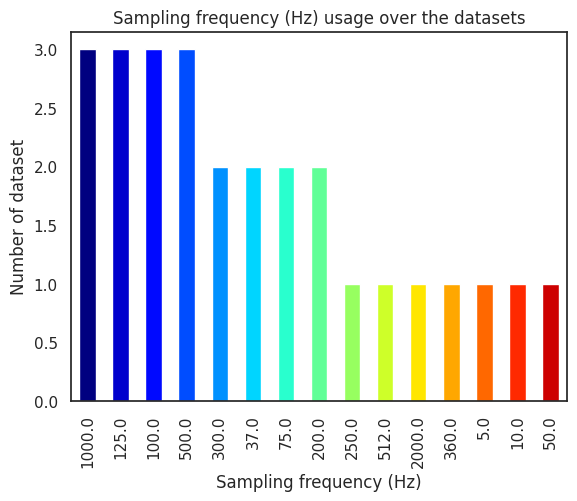

In [86]:
sampling_year=goup_by_year_df['Sampling frequency (Hz)'].value_counts().reset_index(name='Frequency')
#print(segmentation_by_exp)
print(dataset_df['Sampling frequency (Hz)'].count())
percent_missing=((total_exp-dataset_df['Sampling frequency (Hz)'].count())/total_exp)*100
print("percentage of missing values : "+str(percent_missing)+"%")

col_len=len(dataset_df['Sampling frequency (Hz)'].unique())
color = cm.jet(np.linspace(0, 1, col_len))

ax=dataset_df['Sampling frequency (Hz)'].value_counts().plot.bar(color=color)
ax.set_ylabel("Number of dataset")
ax.set_xlabel("Sampling frequency (Hz)")
ax.set_title("Sampling frequency (Hz) usage over the datasets")

['2000' '2003' '2007' '2008' '2011' '2012' '2013' '2014' '2015' '2016'
 '2018' '2019' '2020' '2021']
    Year Sampling frequency (Hz)  Frequency
0   2000                   250.0          1
1   2003                  1000.0          2
2   2007                   300.0          1
3   2008                   125.0          1
4   2011                   100.0          1
5   2011                     nan          1
6   2012                   512.0          1
7   2013                    37.0          2
8   2013                   300.0          1
9   2013                    75.0          1
10  2014                   125.0          1
11  2014                  2000.0          1
12  2014                   500.0          1
13  2015                     nan          1
14  2016                  1000.0          1
15  2016                   500.0          1
16  2018                   100.0          1
17  2018                   125.0          1
18  2018                   200.0          1
19  2018           

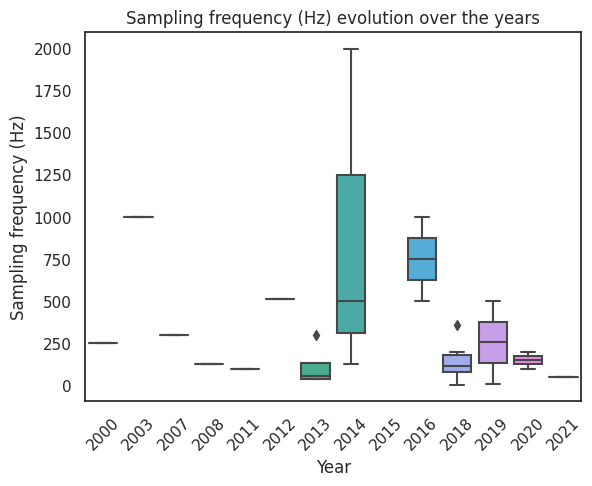

In [92]:
labels=dataset_df["Year"].astype(str).unique()
labels.sort()
print(labels)
uniq_dataset=sampling_year["Sampling frequency (Hz)"].unique()
print(sampling_year)

def plot_box(df:pd.DataFrame,col_name:str,y_title:str,title:str,log:bool):
    ax = sns.boxplot(data=df, y=col_name,x="Year")
    if log : ax.set_yscale('log')
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylabel(y_title)
    ax.set_title(title)
    plt.show()

plot_box(dataset_df,"Sampling frequency (Hz)","Sampling frequency (Hz)","Sampling frequency (Hz) evolution over the years",False)

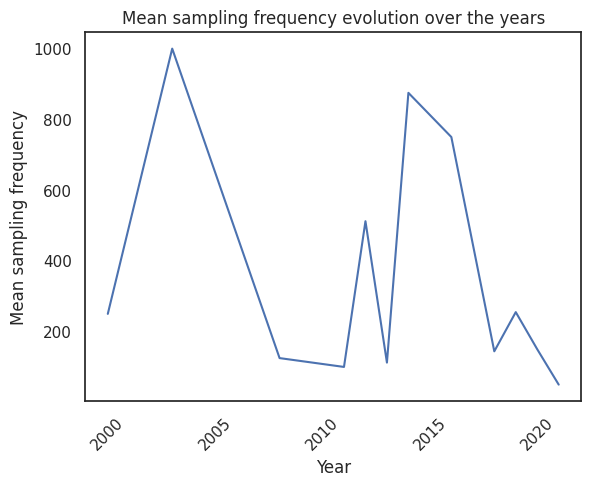

In [95]:
def plot_mean_evolution(df:pd.DataFrame,col_name:str,y_title:str,title:str,log:bool):
    mean_frequency=df[col_name].mean().reset_index(name='mean')
    ax = sns.lineplot(data=mean_frequency, y="mean",x="Year")
    if log : ax.set_yscale('log')
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylabel(y_title)
    ax.set_title(title)
    plt.show()

plot_mean_evolution(goup_by_year_df_float,'Sampling frequency (Hz)',"Mean sampling frequency","Mean sampling frequency evolution over the years",False)

* Transform the custom to the right dataset
* Add the total time for each dataset

## Number of patients

30
percentage of missing values : 0.0%


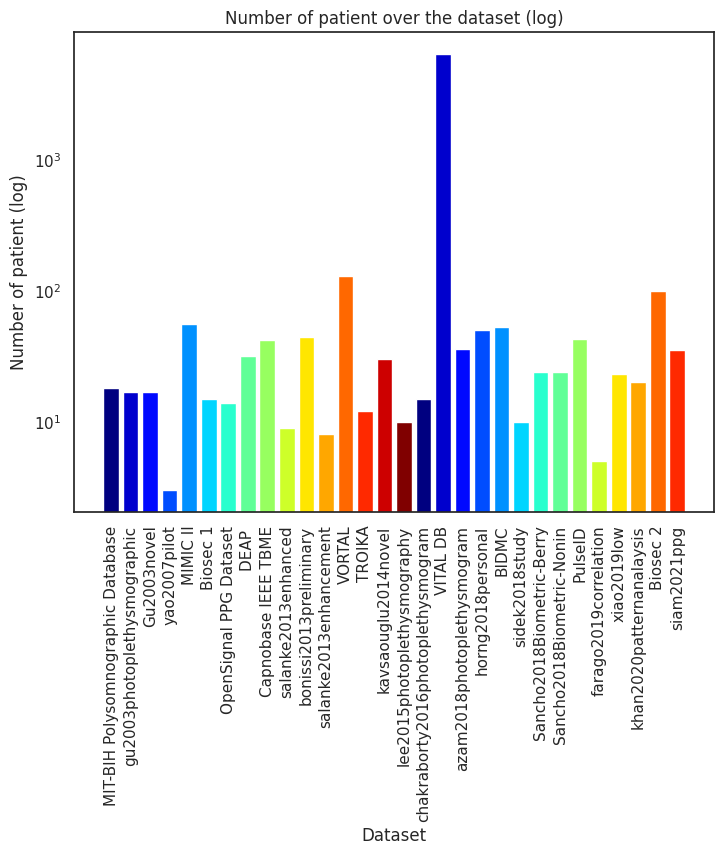

In [89]:
patients_year=goup_by_year_df['Number of patients'].value_counts().reset_index(name='Frequency')
#print(segmentation_by_exp)
print(dataset_df['Number of patients'].count())
percent_missing=((total_exp-dataset_df['Number of patients'].count())/total_exp)*100
print("percentage of missing values : "+str(percent_missing)+"%")

def plot_hist_by_dataset(df,col_name,log:bool,title:str,x_title:str,y_title:str):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    color = cm.jet(np.linspace(0, 1, col_len))
    ax.bar(dataset_df['paper'],dataset_df[col_name],color=color)
    ax.tick_params(axis='x', rotation=90)
    if log : ax.set_yscale('log')
    ax.set_title(title)
    ax.set_ylabel(y_title)
    ax.set_xlabel(x_title)
    plt.show()

plot_hist_by_dataset(dataset_df,'Number of patients',True,"Number of patient over the dataset (log)","Dataset","Number of patient (log)")


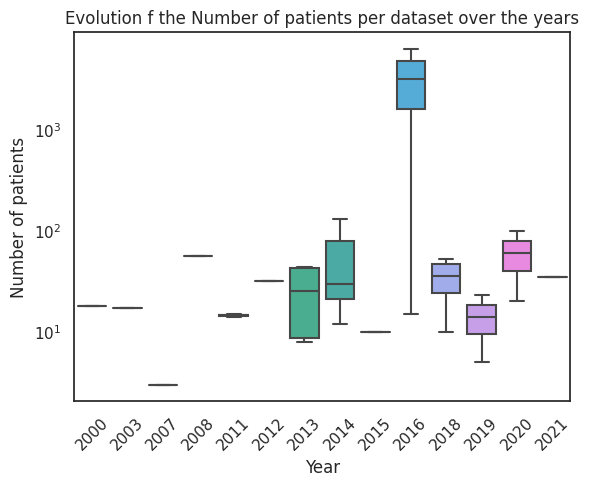

In [93]:
plot_box(dataset_df,"Number of patients","Number of patients","Evolution f the Number of patients per dataset over the years",True)

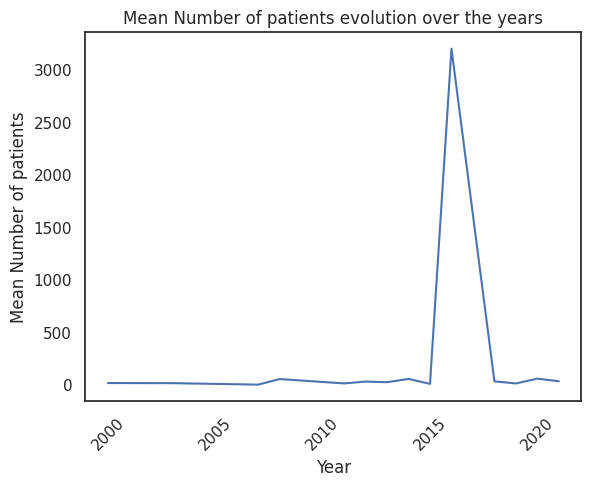

In [98]:
plot_mean_evolution(goup_by_year_df_float,'Number of patients',"Mean Number of patients","Mean Number of patients evolution over the years",False)

/tmp/ipykernel_503/1332159387.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels)


nb col = 2


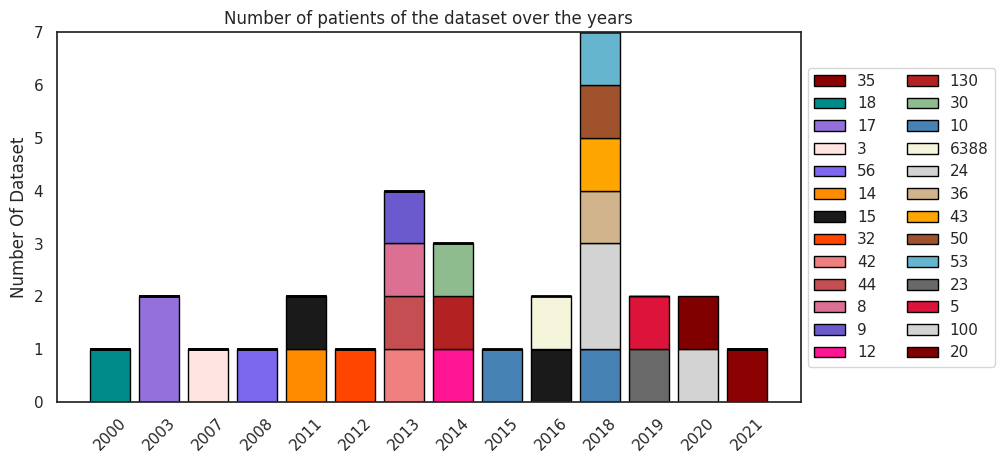

In [100]:
plot_hist_hue(color_map=color_map,freq_df=patients_year,col_name="Number of patients",first_bar='35',x_labels=labels,x_title="years",y_title="Number Of Dataset",title="Number of patients of the dataset over the years")


## Aquisition time

24
percentage of missing values : 20.0%


Text(0.5, 1.0, 'Aquisition time over the datasets')

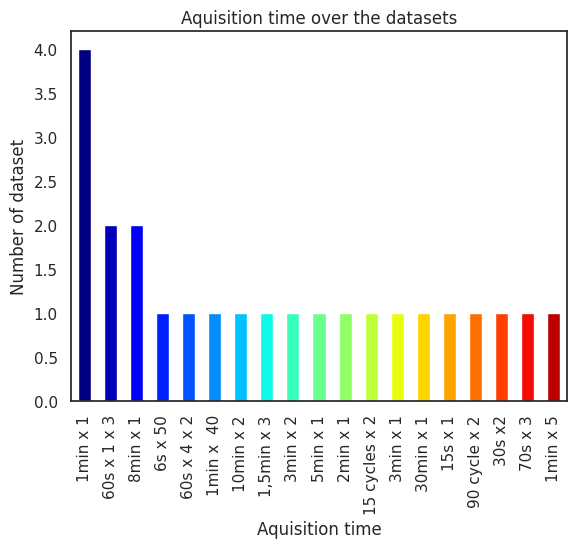

In [12]:
print(dataset_df['Aquisition time'].count())
percent_missing=((total_exp-dataset_df['Aquisition time'].count())/total_exp)*100
print("percentage of missing values : "+str(percent_missing)+"%")

col_len=len(dataset_df['Aquisition time'].unique())
color = cm.jet(np.linspace(0, 1, col_len))

ax=dataset_df['Aquisition time'].value_counts().plot.bar(color=color)
ax.set_ylabel("Number of dataset")
ax.set_xlabel("Aquisition time")
ax.set_title("Aquisition time over the datasets")

    Year Aquisition time  Frequency
0   2000             nan          1
1   2003        1min x 1          2
2   2007         70s x 3          1
3   2008        1min x 1          1
4   2011        3min x 2          1
5   2011             nan          1
6   2012      1min x  40          1
7   2013        2min x 1          1
8   2013          30s x2          1
9   2013     60s x 4 x 2          1
10  2013        8min x 1          1
11  2014       10min x 2          1
12  2014   15 cycles x 2          1
13  2014        5min x 1          1
14  2015             nan          1
15  2016        3min x 1          1
16  2016             nan          1
17  2018     60s x 1 x 3          2
18  2018         15s x 1          1
19  2018        1min x 1          1
20  2018        1min x 5          1
21  2018        8min x 1          1
22  2018    90 cycle x 2          1
23  2019             nan          2
24  2020      1,5min x 3          1
25  2020       30min x 1          1
26  2021         6s x 50    

/tmp/ipykernel_503/1332159387.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels)


nb col = 1


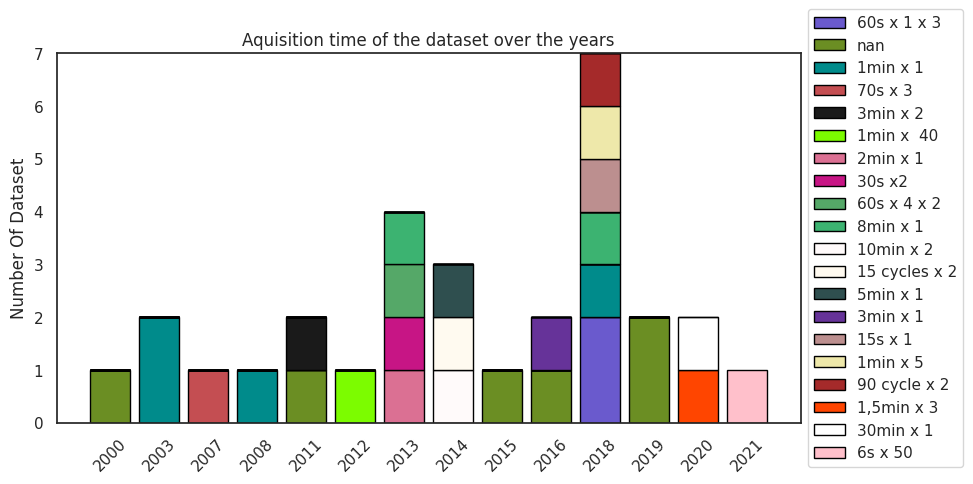

In [13]:
#random.shuffle(color_map)
aquisi_by_dataset=goup_by_year_df['Aquisition time'].value_counts().reset_index(name='Frequency')

print(aquisi_by_dataset)


plot_hist_hue(color_map=color_map,freq_df=aquisi_by_dataset,col_name="Aquisition time",first_bar="60s x 1 x 3",x_labels=labels,x_title="years",y_title="Number Of Dataset",title="Aquisition time of the dataset over the years")


### evolution of total aquired time

The aquired time is represented as follow time x number_of_session x number_of_chanel
The time correspond to the aquired time for one session. The number_of_channel correspond to the different light channel that can be aquired by devices (IR, green light, red light). 

Now we will try to study the total time aquired and available in each dataset. Some Dataset have a NA for the this parameter because the available time is different for each subject. For example the VIDAL DB propose multiples vital signal of patient during surgery. So the available time range from 30min to 10h and differt for each patients. A full study on this dataset will be necessary.

In our case we assume that 1 cycle = 0.85s (correspond to a 70 bpm HR)

Text(0.5, 1.0, 'Evolution of the aquisition time over the years')

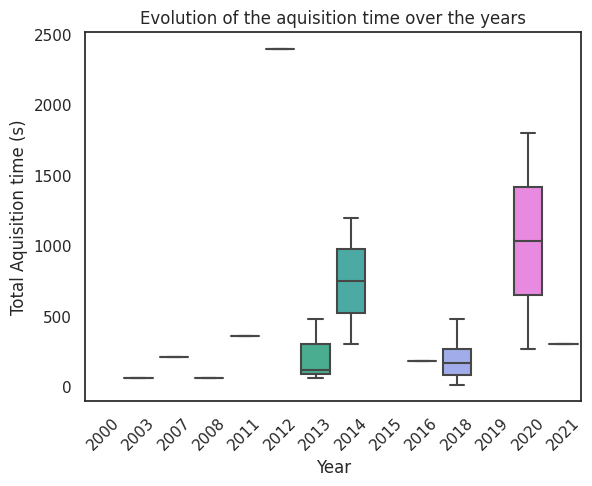

In [14]:
dataset_df.loc[dataset_df['Aquisition time'] == '1min x 1', 'Aquisition time'] = 60
dataset_df.loc[dataset_df['Aquisition time'] == '70s x 3', 'Aquisition time'] = 210
dataset_df.loc[dataset_df['Aquisition time'] == '3min x 2', 'Aquisition time'] = 360
dataset_df.loc[dataset_df['Aquisition time'] == '1min x  40', 'Aquisition time'] = 2400
dataset_df.loc[dataset_df['Aquisition time'] == '2min x  1', 'Aquisition time'] = 120
dataset_df.loc[dataset_df['Aquisition time'] == '30s x  2', 'Aquisition time'] = 60
dataset_df.loc[dataset_df['Aquisition time'] == '30s x2', 'Aquisition time'] = 60
dataset_df.loc[dataset_df['Aquisition time'] == '60s x 4 x 2', 'Aquisition time'] = 480
dataset_df.loc[dataset_df['Aquisition time'] == '8min x 1', 'Aquisition time'] = 480
dataset_df.loc[dataset_df['Aquisition time'] == '10min x 2', 'Aquisition time'] = 1200
dataset_df.loc[dataset_df['Aquisition time'] == '15 cycles x 2', 'Aquisition time'] = 1200
dataset_df.loc[dataset_df['Aquisition time'] == '5min x 1', 'Aquisition time'] = 300
dataset_df.loc[dataset_df['Aquisition time'] == '3min x 1', 'Aquisition time'] = 180
dataset_df.loc[dataset_df['Aquisition time'] == '15s x 1', 'Aquisition time'] = 15
dataset_df.loc[dataset_df['Aquisition time'] == '90 cycle x 2', 'Aquisition time'] = 90*2*0.85
dataset_df.loc[dataset_df['Aquisition time'] == '1,5min x 3', 'Aquisition time'] = 60*1.5*3
dataset_df.loc[dataset_df['Aquisition time'] == '30min x 1', 'Aquisition time'] = 1800
dataset_df.loc[dataset_df['Aquisition time'] == '6s x 50', 'Aquisition time'] = 300
dataset_df.loc[dataset_df['Aquisition time'] == '2min x 1', 'Aquisition time'] = 120
dataset_df.loc[dataset_df['Aquisition time'] == '60s x 1 x 3', 'Aquisition time'] = 180
dataset_df.loc[dataset_df['Aquisition time'] == '1min x 5', 'Aquisition time'] = 300



goup_by_year_df=dataset_df.astype(str).groupby('Year')
aquisi_by_dataset=goup_by_year_df['Aquisition time'].value_counts().reset_index(name='Frequency')

aquisi_by_dataset['Aquisition time']=aquisi_by_dataset['Aquisition time'].astype(float)
ax = sns.boxplot(data=aquisi_by_dataset, y="Aquisition time",x="Year", order=order )
#ax.set_yscale('log')
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel("Total Aquisition time (s)")
ax.set_title("Evolution of the aquisition time over the years")

    Year    mean
0   2000     NaN
1   2003    60.0
2   2007   210.0
3   2008    60.0
4   2011   360.0
5   2012  2400.0
6   2013   220.0
7   2014   750.0
8   2015     NaN
9   2016   180.0
10  2018   198.0
11  2019     NaN
12  2020  1035.0
13  2021   300.0


Text(0.5, 1.0, 'Aquisition time (s) evolution over the years')

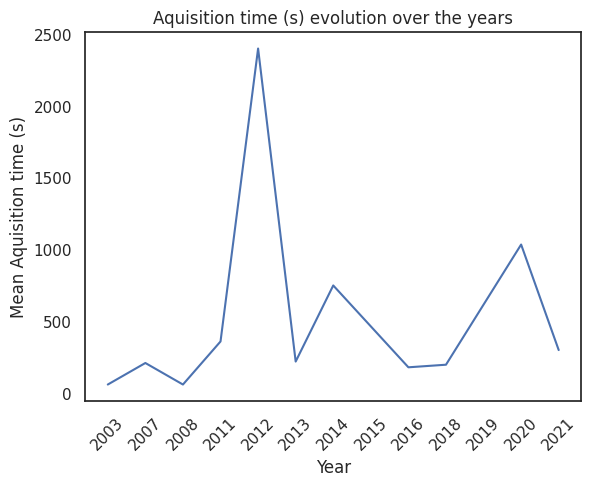

In [15]:
goup_by_year_df_float=aquisi_by_dataset.groupby('Year')
goup_by_year_df_float.describe()
mean_aqui=goup_by_year_df_float['Aquisition time'].mean().reset_index(name='mean')
print(mean_aqui)

ax = sns.lineplot(data=mean_aqui, y="mean",x="Year")
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel("Mean Aquisition time (s)")
ax.set_title("Aquisition time (s) evolution over the years")

## Dataset time usage over the years and experiences

In this section we want to draw the mix of the dataset time usage over the years. For each dataset we compute the total time provided and the total experience usage. We will draw a steam graph to reprensent the total data consumed by the community each years. The quantity of data consumed correspond to the total data of a dataset multiply by the number of patient multiply by the number of experiences that use it in one year. 

### General set up

In [16]:
exp_df=pd.read_csv("./all_exp_v2.csv",delimiter=';')
exp_df=exp_df.drop('NONE',axis=1)
exp_df=exp_df.drop('Segmentation',axis=1)
exp_df=exp_df.drop('Noise reduction',axis=1)
exp_df=exp_df.drop('Normalization',axis=1)
exp_df=exp_df.drop('Features type',axis=1)
exp_df=exp_df.drop('Feature length',axis=1)
exp_df=exp_df.drop('Algorithm type',axis=1)
exp_df=exp_df.drop('Architecture',axis=1)
exp_df=exp_df.drop('Training dataset',axis=1)
exp_df=exp_df.drop('Feature extraction or selection methods',axis=1)
exp_df=exp_df.drop('Evaluation dataset',axis=1)
exp_df=exp_df.drop('Validation method',axis=1)
exp_df=exp_df.drop('Accuracy',axis=1)
exp_df=exp_df.drop('EER',axis=1)
exp_df=exp_df.drop('Lowest FMR',axis=1)
exp_df=exp_df.drop('Lowest FMNR',axis=1)


exp_df['Year']=[re.findall(r'\d+',p)[0] for p in exp_df['paper']]

## Clean the dataset

exp_df.loc[exp_df['Dataset'] == 'CUSTOM 1', 'Dataset'] = 'CUSTOM'
exp_df.loc[exp_df['Dataset'] == 'CUSTOM 2', 'Dataset'] = 'CUSTOM'
exp_df.loc[exp_df['Dataset'] == 'CUSTOM 1 + CUSTOM 2', 'Dataset'] = 'CUSTOM'
exp_df.loc[exp_df['Dataset'] == 'Biosec1', 'Dataset'] = 'Biosec 1'
exp_df.loc[exp_df['Dataset'] == 'Biosec2', 'Dataset'] = 'Biosec 2'
exp_df.loc[exp_df['Dataset'] == 'Biosec3', 'Dataset'] = 'Biosec 2'
exp_df.loc[exp_df['Dataset'] == 'PRRB', 'Dataset'] = 'Capnobase IEEE TBME'
exp_df.loc[exp_df['Dataset'] == 'PRBB', 'Dataset'] = 'Capnobase IEEE TBME'
exp_df.loc[exp_df['Dataset'] == 'MIMIC', 'Dataset'] = 'MIMIC II'



#goup_by_year_df=exp_df.groupby('Year')
#goup_by_year_df.describe()


In [17]:
custom_paper_dataset=dataset_df['paper'].to_list()

for index, row in exp_df.iterrows():
    if row['Dataset'] == 'CUSTOM':
        if row['paper'] in custom_paper_dataset :
            row['Dataset']=row['paper']
            
exp_df.head(-15)

,paper,Dataset,Year
0,donida2021biometric,Capnobase IEEE TBME,2021
1,donida2021biometric,Capnobase IEEE TBME,2021
2,bastos2021smart,MIMIC II,2021
3,bastos2021smart,Capnobase IEEE TBME,2021
4,yang2021study,BIDMC,2021
...,...,...,...
583,farago2019correlation,farago2019correlation,2019
584,salanke2013enhancement,salanke2013enhancement,2013
585,sidek2016development,MIMIC II,2016
586,sidek2016development,MIMIC II,2016


In [18]:
dataset_df.rename(columns={'paper': 'Dataset','Year':'Dataset_Year'}, inplace=True)
merged_dataset_df=pd.merge(exp_df,dataset_df,on='Dataset')
merged_dataset_df.head(-15)

,paper,Dataset,Year,Dataset_Year,Sampling frequency (Hz),Aquisition time,Number of patients,Conditions,Time interval
0,donida2021biometric,Capnobase IEEE TBME,2021,2013,300.0,480,42,NaN,NaN
1,donida2021biometric,Capnobase IEEE TBME,2021,2013,300.0,480,42,NaN,NaN
2,bastos2021smart,Capnobase IEEE TBME,2021,2013,300.0,480,42,NaN,NaN
3,yang2021study,Capnobase IEEE TBME,2021,2013,300.0,480,42,NaN,NaN
4,yang2021study,Capnobase IEEE TBME,2021,2013,300.0,480,42,NaN,NaN
...,...,...,...,...,...,...,...,...,...
528,hwang2020evaluation,Biosec 2,2020,2020,100.0,270.0,100,Finger PPG; in relaxation,few seconds
529,hwang2020evaluation,Biosec 2,2020,2020,100.0,270.0,100,Finger PPG; in relaxation,few seconds
530,hwang2020evaluation,Biosec 2,2020,2020,100.0,270.0,100,Finger PPG; in relaxation,few seconds
531,hwang2020evaluation,Biosec 2,2020,2020,100.0,270.0,100,Finger PPG; in relaxation,few seconds


### Compute

In [19]:
def add_freq_to_dataset(year,dataset,df):
    year_index=df.index[df['Year'] == year ].tolist()
    for yi in year_index :
        if df.iloc[yi]['Dataset'] == dataset:
            #print(df.iloc[yi]['Dataset'])
            df.at[yi,'Frequency']=df.iloc[yi]['Frequency']+1
            #print(df.iloc[yi]['Frequency'])
            return df
    new_row = {'Year':year, 'Dataset':dataset, 'Frequency':1}
    new_df = pd.DataFrame([new_row],index=[yi])
    return pd.concat([df.iloc[:yi-1], new_df, df.iloc[yi-1:]]).reset_index(drop=True)

In [20]:
# Get the Frequency (nb of experience that use the dataset) of each dataset by year
exp_dataset_by_year_df=merged_dataset_df.astype(str).groupby(['Year', 'Dataset']).size().reset_index(name='Frequency')
#exp_dataset_by_year_df['Frequency'].iloc[0]+=5
composed_dataset={'PRRB + MIMIC2 + Nonin + Berry (short term)':['Capnobase IEEE TBME','MIMIC II'],
'MIMIC2 + Nonin + Berry (Long term)':['MIMIC II'],
'Capnobase + Biosec1 + 3 random':['Capnobase IEEE TBME','Biosec 1']}

for index, row in exp_df.iterrows():
    if row['Dataset'] in composed_dataset.keys():
        year=row['Year']
        #print("BASED DATASET = "+str(row['Dataset']))
        for dt_to_update in composed_dataset[row['Dataset']] :
            exp_dataset_by_year_df=add_freq_to_dataset(year,dt_to_update,exp_dataset_by_year_df)

print(exp_dataset_by_year_df)




    Year                            Dataset  Frequency
0   2003                        Gu2003novel          1
1   2003        gu2003photoplethysmographic          1
2   2007                       yao2007pilot          1
3   2011                           Biosec 1          1
4   2011             OpenSignal PPG Dataset          1
5   2013             bonissi2013preliminary          1
6   2013             salanke2013enhancement          6
7   2014                kavsaouglu2014novel        120
8   2015                           MIMIC II          4
9   2015        lee2015photoplethysmography          1
10  2016                              DEAP           8
11  2016                           MIMIC II          4
12  2016  MIT-BIH Polysomnographic Database          3
13  2016                             TROIKA          1
14  2016  chakraborty2016photoplethysmogram          1
15  2017                Capnobase IEEE TBME         18
16  2018                Capnobase IEEE TBME         29
17  2018  

In [21]:
consume_data_by_year_df=exp_dataset_by_year_df
consume_data_by_year_df.rename(columns={'Frequency': 'Consumed Data'}, inplace=True)

for index, row in consume_data_by_year_df.iterrows():
    aqui_index=merged_dataset_df.index[merged_dataset_df['Dataset'] == row['Dataset'] ].tolist()[0]
    aqui_time=merged_dataset_df.iloc[aqui_index]['Aquisition time']
    nb_patient=merged_dataset_df.iloc[aqui_index]['Number of patients']
    if aqui_time > 0:
        #print(str(type(aqui_time))+' = '+str(aqui_time))
        consume_data_by_year_df.at[index,'Consumed Data']=(consume_data_by_year_df.iloc[index]['Consumed Data']*aqui_time*nb_patient)/(60)## /(60) reduce the absolute value and goes in min
    else :
        consume_data_by_year_df.at[index,'Consumed Data']=0
        #print(str(type(aqui_time))+' to replace = '+str(aqui_time))


print(consume_data_by_year_df)
    

    Year                            Dataset  Consumed Data
0   2003                        Gu2003novel           17.0
1   2003        gu2003photoplethysmographic           17.0
2   2007                       yao2007pilot           10.5
3   2011                           Biosec 1           90.0
4   2011             OpenSignal PPG Dataset            0.0
5   2013             bonissi2013preliminary           88.0
6   2013             salanke2013enhancement           48.0
7   2014                kavsaouglu2014novel        72000.0
8   2015                           MIMIC II          224.0
9   2015        lee2015photoplethysmography            0.0
10  2016                              DEAP         10240.0
11  2016                           MIMIC II          224.0
12  2016  MIT-BIH Polysomnographic Database            0.0
13  2016                             TROIKA           60.0
14  2016  chakraborty2016photoplethysmogram           45.0
15  2017                Capnobase IEEE TBME         6048

### Plot

/tmp/ipykernel_503/2021466546.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels)


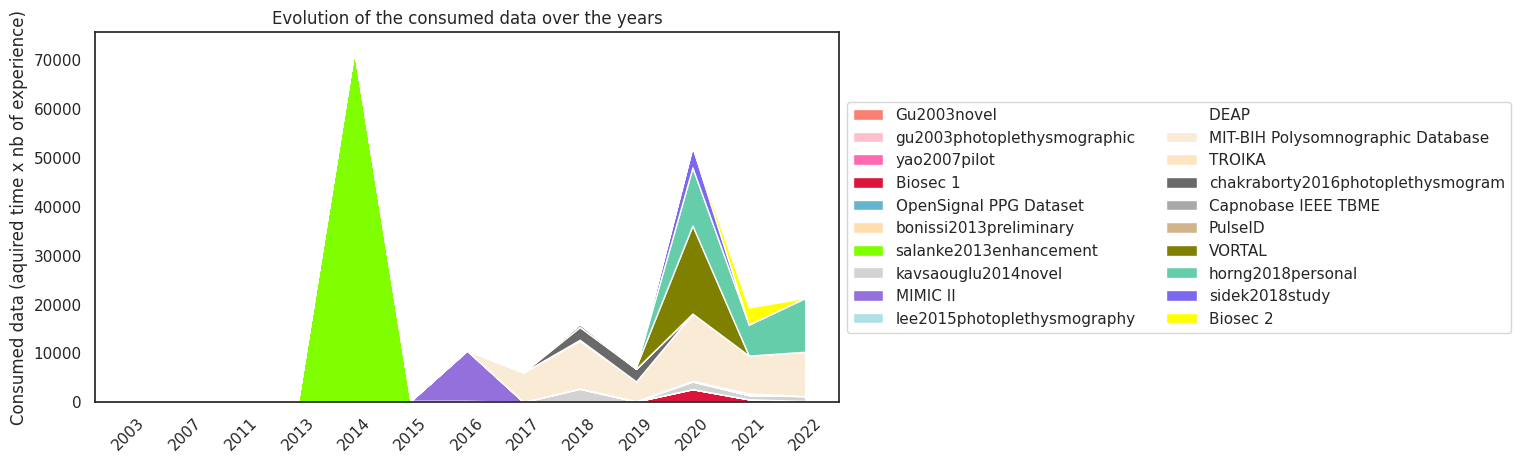

In [22]:
labels=consume_data_by_year_df['Dataset'].unique().tolist() ## Labels for the areas
x_labels=consume_data_by_year_df['Year'].unique().tolist() ## x_ticks label = years
d_values={d:[0]*len(x_labels) for d in labels}

for index, row in consume_data_by_year_df.iterrows():
    year_index=x_labels.index(row['Year'])
    dataset_to_update=row['Dataset']
    D_conso=row['Consumed Data']
    d_values[dataset_to_update][year_index]=D_conso


d_values.pop('OpenSignal PPG Dataset', None)
d_values.pop('lee2015photoplethysmography', None)
d_values.pop('VITAL DB', None)
d_values.pop('MIT-BIH Polysomnographic Database', None)
d_values.pop('farago2019correlation', None)
d_values.pop('xiao2019low', None)






y_val=[d for d in d_values.values()]



random.shuffle(color_map)

fig, ax = plt.subplots()


ax.stackplot(x_labels,y_val,labels=labels,colors=color_map[0:len(labels)])
ax.set_ylabel("Consumed data (aquired time x nb of experience)")
ax.set_title("Evolution of the consumed data over the years")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.5, box.height])

nb_col=math.ceil(len(labels)/20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=nb_col)
ax.set_xticklabels(x_labels)
ax.tick_params(axis='x', rotation=45)

plt.show()

### Tree map version

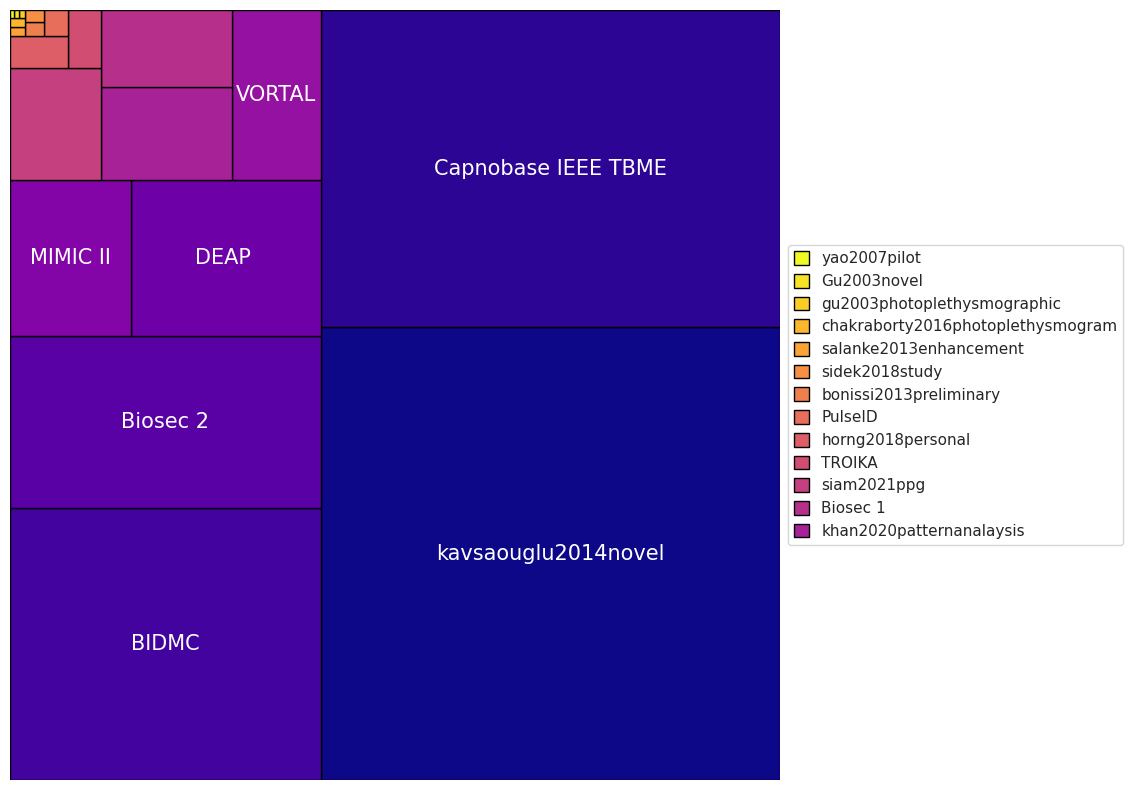

In [23]:
t_map_values={k:sum(s) for k,s in d_values.items()}
t_map_values={k: v for k, v in sorted(t_map_values.items(), key=lambda item: item[1])}

fig=plt.figure(figsize=(10, 10))
labels = list(reversed(t_map_values.keys()))
sizes = list(reversed(t_map_values.values()))
num_labels_in_legend = 13

ax = squarify.plot(sizes, label=labels[:-num_labels_in_legend], color=plt.cm.plasma(np.linspace(0, 1, len(labels))),
                   ec='black',  text_kwargs={'color': 'white', 'size': 15})
ax.axis('off')
ax.invert_xaxis()
ax.set_aspect('equal')
plt.legend(handles=ax.containers[0][:-num_labels_in_legend - 1:-1], labels=labels[:-num_labels_in_legend - 1:-1],
           handlelength=1, handleheight=1,loc='center left', bbox_to_anchor=(1, 0.5),ncol=1)
plt.show()


/tmp/ipykernel_503/4182220975.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels[6:])


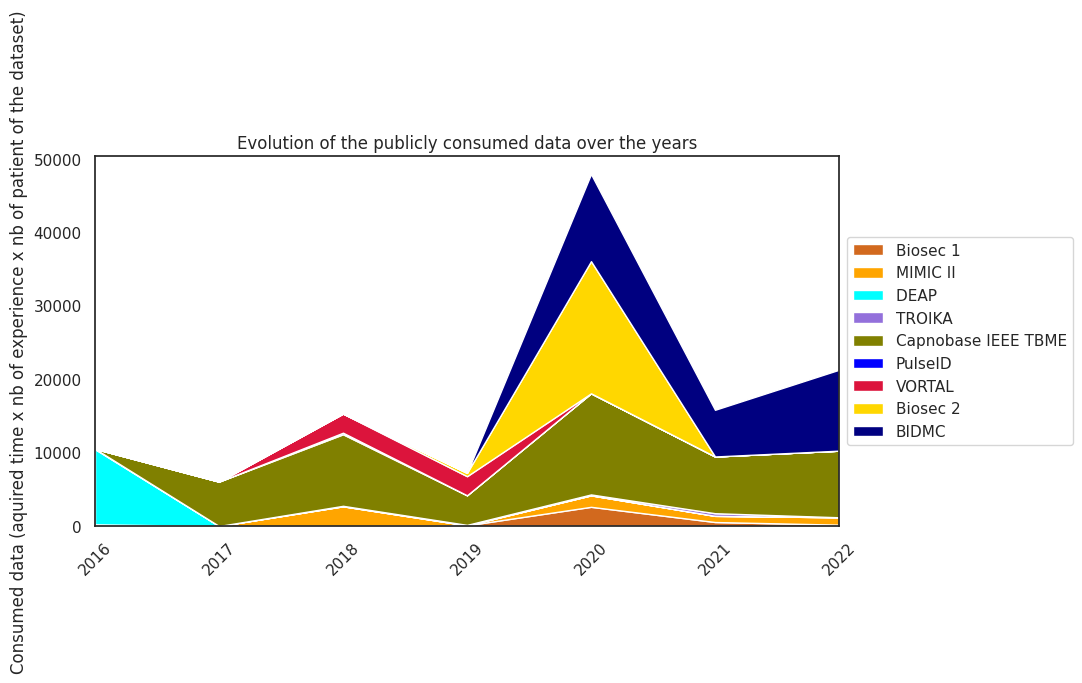

In [24]:
#d_values.pop('kavsaouglu2014novel', None)
value_to_filter=[
    'kavsaouglu2014novel',
    'siam2021ppg',
    'xiao2019low',
    'lee2015photoplethysmography',
    'yao2007pilot',
    'gu2003photoplethysmographic',
    'sidek2018study',
    'salanke2013enhancement',
    'horng2018personal',
    'azam2018photoplethysmogram',
    'khan2020patternanalaysis',
    'chakraborty2016photoplethysmogram',
    'bonissi2013preliminary',
    'Gu2003novel',
    'farago2019correlation',
    'salanke2013enhancement']
for f in value_to_filter :
    d_values.pop(f,None)
y_val=[d[6:] for d in d_values.values()]



#random.shuffle(color_map)
n_color_map=[
    'chocolate', 'orange', 'aqua', 'mediumpurple', 
    'olive', 'blue','crimson','gold', 'navy', 
    'indigo', 'darkturquoise', 'chartreuse']

fig, ax = plt.subplots()

ax.stackplot(x_labels[6:],y_val,labels=d_values.keys(),colors=n_color_map)
ax.legend(loc='upper left')
ax.set_xlim('2016','2022')
ax.set_ylabel("Consumed data (aquired time x nb of experience x nb of patient of the dataset)")
ax.set_title("Evolution of the publicly consumed data over the years")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.5, box.height])

# Put a legend to the right of the current axis
nb_col=math.ceil(len(d_values.keys())/20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=nb_col)
#ax.set_yscale('log')
ax.set_xticklabels(x_labels[6:])
ax.tick_params(axis='x', rotation=45)

plt.show()

### Tree map version of poped dict

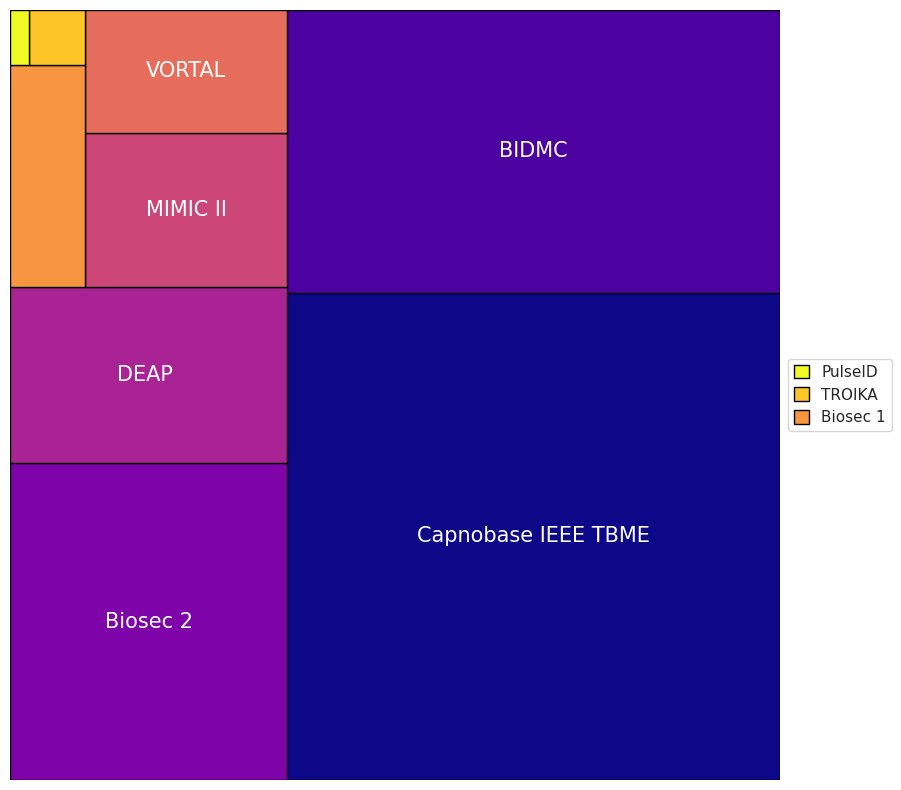

In [25]:
t_map_values={k:sum(s) for k,s in d_values.items()}
t_map_values={k: v for k, v in sorted(t_map_values.items(), key=lambda item: item[1])}

fig=plt.figure(figsize=(10, 10))
labels = list(reversed(t_map_values.keys()))
sizes = list(reversed(t_map_values.values()))
num_labels_in_legend = 3

ax = squarify.plot(sizes, label=labels[:-num_labels_in_legend], color=plt.cm.plasma(np.linspace(0, 1, len(labels))),
                   ec='black',  text_kwargs={'color': 'white', 'size': 15})
ax.axis('off')
ax.invert_xaxis()
ax.set_aspect('equal')
plt.legend(handles=ax.containers[0][:-num_labels_in_legend - 1:-1], labels=labels[:-num_labels_in_legend - 1:-1],
           handlelength=1, handleheight=1,loc='center left', bbox_to_anchor=(1, 0.5),ncol=1)
plt.show()